In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.replace('?', np.nan, inplace=True) # The dataset uses '?' for missing values. Replace with NaN

In [4]:
df.dropna(inplace=True) # Drop all rows that have any missing values

In [5]:
y = df['occupation']

In [6]:
X = df.drop(columns=['occupation', 'education', 'fnlwgt', 'income'])

In [7]:
X.head()

,age,workclass,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,7,Never-married,Own-child,Black,Male,0,0,40,United-States
1,38,Private,9,Married-civ-spouse,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,12,Married-civ-spouse,Husband,White,Male,0,0,40,United-States
3,44,Private,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,United-States
5,34,Private,6,Never-married,Not-in-family,White,Male,0,0,30,United-States


In [8]:
y.head()

0    Machine-op-inspct
1      Farming-fishing
2      Protective-serv
3    Machine-op-inspct
5        Other-service
Name: occupation, dtype: object

In [9]:
print("Original data types in X:")
print(X.dtypes)

Original data types in X:
age                 int64
workclass          object
educational-num     int64
marital-status     object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object


In [10]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [11]:
print("\n--- Features after Encoding ---")
print(X_encoded.dtypes)


--- Features after Encoding ---
age                               int64
educational-num                   int64
capital-gain                      int64
capital-loss                      int64
hours-per-week                    int64
                                  ...  
native-country_Thailand            bool
native-country_Trinadad&Tobago     bool
native-country_United-States       bool
native-country_Vietnam             bool
native-country_Yugoslavia          bool
Length: 67, dtype: object


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
y_encoded = le.fit_transform(y)

In [14]:
print("First 5 original labels:", y.head().values)

First 5 original labels: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv'
 'Machine-op-inspct' 'Other-service']


In [15]:
print("First 5 encoded labels:", y_encoded[:5])

First 5 encoded labels: [ 6  4 10  6  7]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_names = le.inverse_transform(unique_classes)

In [24]:
print("--- Class Distribution in the Training Set (Before SMOTE) ---")
for name, count in zip(class_names, class_counts):
    print(f"{name}: {count}")

--- Class Distribution in the Training Set (Before SMOTE) ---
Adm-clerical: 4432
Armed-Forces: 11
Craft-repair: 4816
Exec-managerial: 4787
Farming-fishing: 1184
Handlers-cleaners: 1637
Machine-op-inspct: 2376
Other-service: 3846
Priv-house-serv: 186
Prof-specialty: 4806
Protective-serv: 781
Sales: 4326
Tech-support: 1136
Transport-moving: 1853


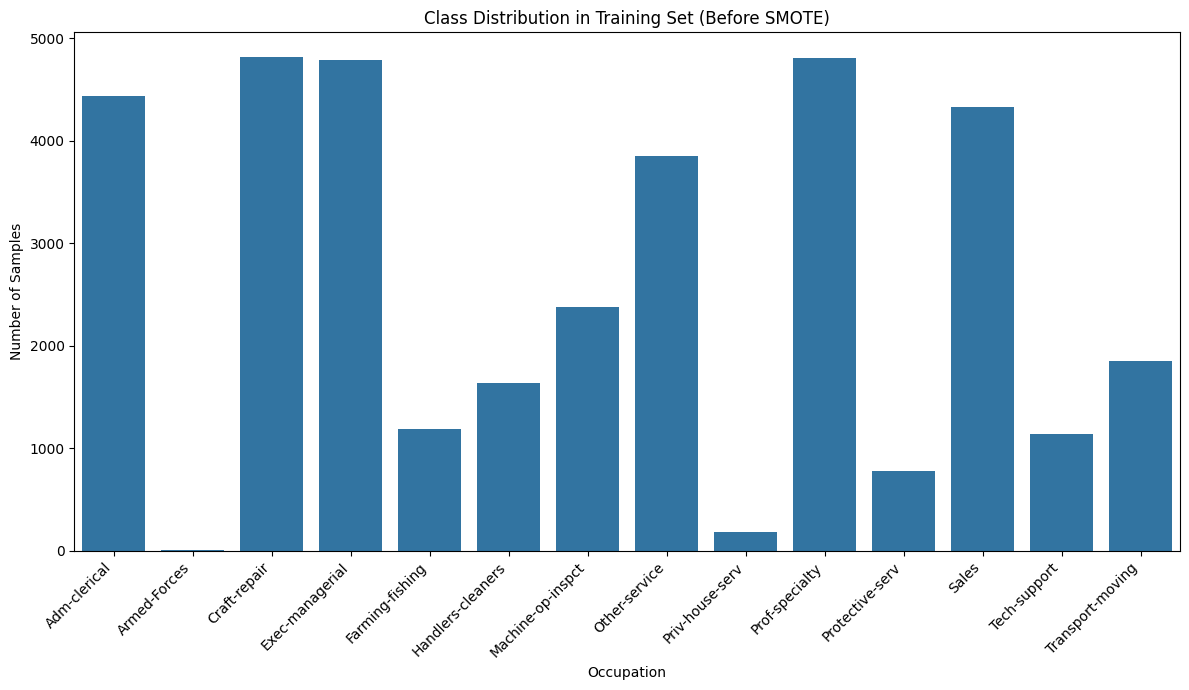

In [25]:
plt.figure(figsize=(12, 7))
sns.barplot(x=class_names, y=class_counts)
plt.title('Class Distribution in Training Set (Before SMOTE)')
plt.xlabel('Occupation')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote = SMOTE(random_state=42)

In [28]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [29]:
unique_classes_res, class_counts_res = np.unique(y_train_resampled, return_counts=True)
class_names_res = le.inverse_transform(unique_classes_res)

In [30]:
print("\n--- Class Distribution in the Training Set (After SMOTE) ---")
for name, count in zip(class_names_res, class_counts_res):
    print(f"{name}: {count}")


--- Class Distribution in the Training Set (After SMOTE) ---
Adm-clerical: 4816
Armed-Forces: 4816
Craft-repair: 4816
Exec-managerial: 4816
Farming-fishing: 4816
Handlers-cleaners: 4816
Machine-op-inspct: 4816
Other-service: 4816
Priv-house-serv: 4816
Prof-specialty: 4816
Protective-serv: 4816
Sales: 4816
Tech-support: 4816
Transport-moving: 4816


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Generates and plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [33]:
# --- Support Vector Machine (SVM) ---
from sklearn.svm import SVC

In [34]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

In [35]:
svm_linear.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', random_state=42)

In [36]:
y_pred_linear = svm_linear.predict(X_test_scaled)

In [37]:
print("\n--- Evaluation: SVM (Linear Kernel) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear, target_names=class_names))


--- Evaluation: SVM (Linear Kernel) ---
Accuracy: 0.2673

Classification Report:
                   precision    recall  f1-score   support

     Adm-clerical       0.33      0.39      0.36      1108
     Armed-Forces       0.01      0.33      0.02         3
     Craft-repair       0.32      0.27      0.29      1204
  Exec-managerial       0.37      0.18      0.24      1197
  Farming-fishing       0.19      0.45      0.27       296
Handlers-cleaners       0.16      0.41      0.23       409
Machine-op-inspct       0.24      0.03      0.05       594
    Other-service       0.38      0.07      0.12       962
  Priv-house-serv       0.04      0.74      0.08        46
   Prof-specialty       0.46      0.60      0.52      1202
  Protective-serv       0.25      0.57      0.34       195
            Sales       0.21      0.01      0.03      1082
     Tech-support       0.09      0.09      0.09       284
 Transport-moving       0.19      0.33      0.24       463

         accuracy              


Confusion Matrix:


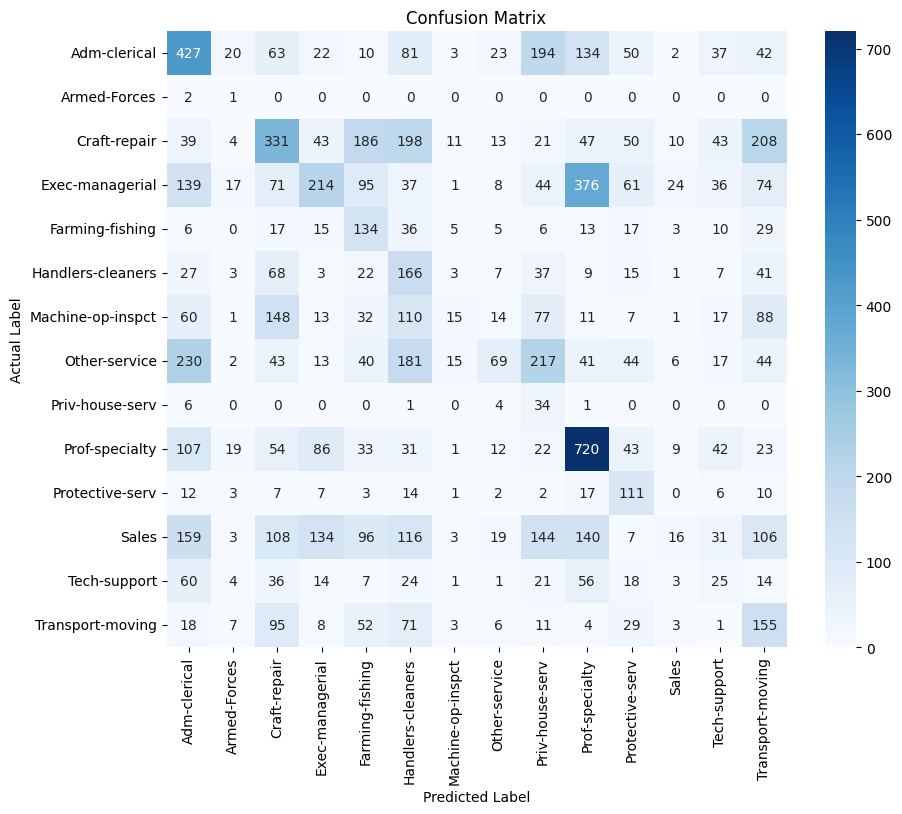

In [38]:
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, y_pred_linear, class_names)

In [39]:
# --- SVM with RBF Kernel ---
svm_rbf = SVC(kernel='rbf', C=1.0, random_state=42)

In [40]:
svm_rbf.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [41]:
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [42]:
print("\n--- Evaluation: SVM (RBF Kernel) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=class_names))


--- Evaluation: SVM (RBF Kernel) ---
Accuracy: 0.2741

Classification Report:
                   precision    recall  f1-score   support

     Adm-clerical       0.33      0.38      0.35      1108
     Armed-Forces       0.01      0.33      0.02         3
     Craft-repair       0.32      0.30      0.31      1204
  Exec-managerial       0.37      0.25      0.30      1197
  Farming-fishing       0.22      0.45      0.29       296
Handlers-cleaners       0.16      0.38      0.22       409
Machine-op-inspct       0.18      0.07      0.10       594
    Other-service       0.35      0.15      0.21       962
  Priv-house-serv       0.05      0.46      0.08        46
   Prof-specialty       0.50      0.48      0.49      1202
  Protective-serv       0.23      0.59      0.34       195
            Sales       0.25      0.01      0.03      1082
     Tech-support       0.08      0.16      0.11       284
 Transport-moving       0.18      0.29      0.23       463

         accuracy                 


Confusion Matrix:


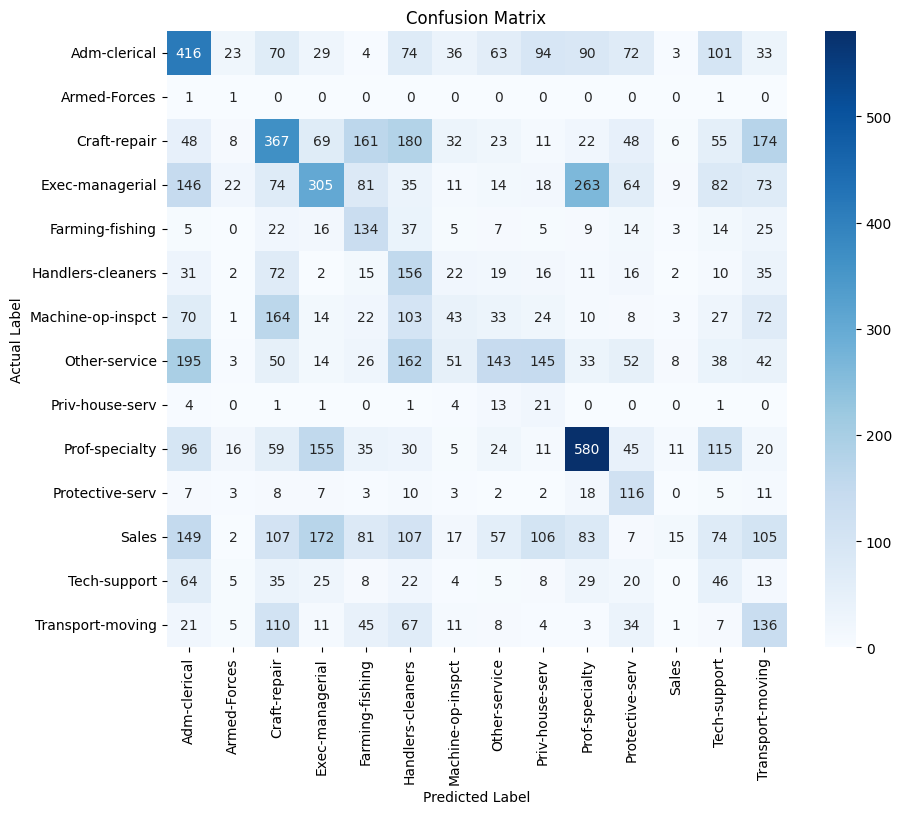

In [43]:
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, y_pred_rbf, class_names)

In [44]:
# --- SVM with Polynomial Kernel ---
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)

In [45]:
svm_poly.fit(X_train_resampled, y_train_resampled)

SVC(kernel='poly', random_state=42)

In [46]:
y_pred_poly = svm_poly.predict(X_test_scaled)

In [47]:
print("\n--- Evaluation: SVM (Polynomial Kernel) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly, target_names=class_names))


--- Evaluation: SVM (Polynomial Kernel) ---
Accuracy: 0.2095

Classification Report:
                   precision    recall  f1-score   support

     Adm-clerical       0.32      0.32      0.32      1108
     Armed-Forces       0.02      1.00      0.04         3
     Craft-repair       0.22      0.06      0.10      1204
  Exec-managerial       0.35      0.16      0.22      1197
  Farming-fishing       0.22      0.45      0.29       296
Handlers-cleaners       0.17      0.32      0.22       409
Machine-op-inspct       0.20      0.09      0.12       594
    Other-service       0.33      0.15      0.21       962
  Priv-house-serv       0.07      0.35      0.11        46
   Prof-specialty       0.61      0.28      0.39      1202
  Protective-serv       0.22      0.60      0.32       195
            Sales       0.18      0.02      0.03      1082
     Tech-support       0.06      0.19      0.09       284
 Transport-moving       0.10      0.56      0.18       463

         accuracy          


Confusion Matrix:


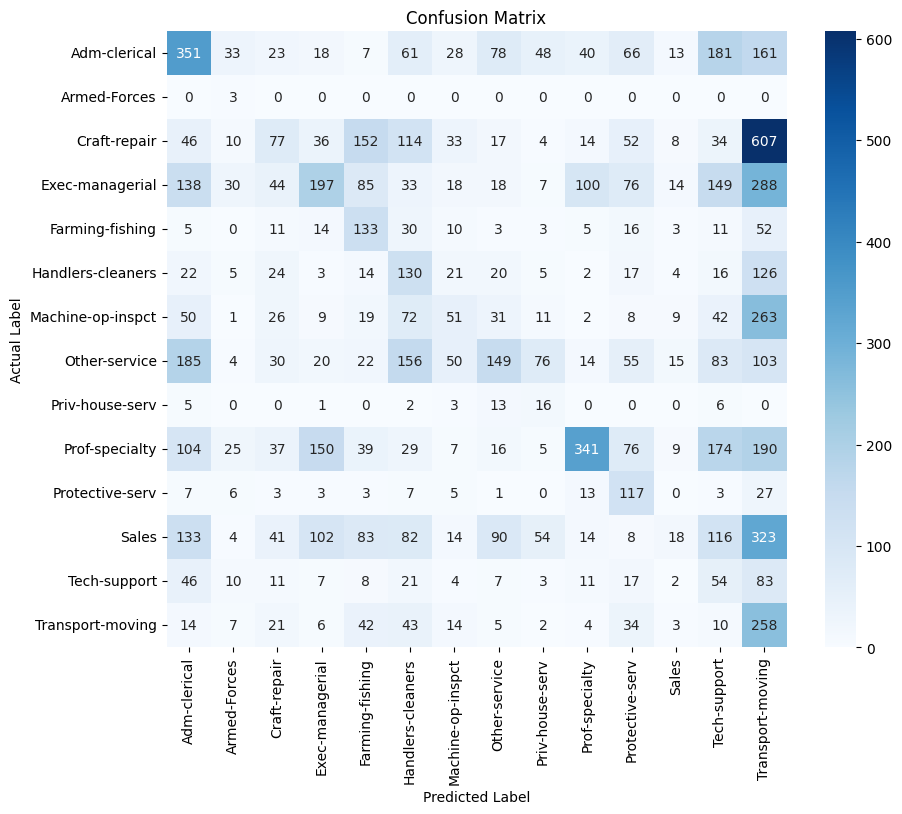

In [48]:
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, y_pred_poly, class_names)

### SVM: Kernel Comparison and Justification

Three Support Vector Machine models were trained using `sklearn.svm.SVC` with different kernels: Linear, RBF (Radial Basis Function), and Polynomial (degree 3). The objective was to identify the most effective kernel for the occupation classification task on this dataset. The performance of each model was evaluated on the held-out test set.

#### Performance Metrics

The key performance metrics are summarized in the table below. The F1-score is highlighted as it provides a balanced measure of precision and recall, which is particularly important for our imbalanced test set. The "Macro Avg" F1-score treats all classes equally, while the "Weighted Avg" F1-score accounts for class imbalance.

| Kernel | Overall Accuracy | Macro Avg F1-Score | Weighted Avg F1-Score |
| :--- | :--- | :--- | :--- |
| **Linear** | `0.2667` | `0.20` | `0.24` |
| **RBF** | `0.2745` | `0.22` | `0.27` |
| **Polynomial**| `0.2096` | `0.19` | `0.21` |

---

#### Analysis of Each Kernel

*   **Linear Kernel:**  The linear kernel achieved an accuracy of 26.67% and a macro F1-score of 0.20. Looking at its classification report, the model performed best on Prof-specialty (0.52 F1-score), but struggled significantly with most other classes, especially Sales (0.03 F1-score) and Machine-op-inspct (0.05 F1-score). The confusion matrix confirms this, showing a high number of misclassifications. For example, the model incorrectly classified 199 Craft-repair workers as Handlers-cleaners and 217 Other-service workers as Prof-specialty, indicating a clear inability to distinguish between related job types. This poor performance visually and metrically suggests that the underlying data is not linearly separable, and a simple hyperplane is insufficient to model the complex relationships between the features and occupation classes.

*   **RBF Kernel:** The RBF kernel demonstrated a slight improvement over the linear model, achieving an accuracy of 27.45% and a macro F1-score of 0.22. While these overall metrics are still low, the confusion matrix reveals that the non-linear RBF kernel began to learn more nuanced patterns. The number of correct predictions along the diagonal improved for several key classes, such as Craft-repair increasing from 328 to 368 and Exec-managerial from 215 to 305. However, the model still suffers from significant confusion. For example, it misclassified 180 Craft-repair workers as Handlers-cleaners and 155 Prof-specialty members as Exec-managerial. This shows that while the RBF kernel is a better fit than the linear one, it is still not powerful enough to overcome the significant class overlap and complexity in this high-dimensional feature space.

*   **Polynomial Kernel:** The polynomial kernel (degree 3) performed the worst of the three, with an accuracy of only 20.96% and a macro F1-score of 0.19. The confusion matrix reveals a significant issue: the model has developed a strong, incorrect bias towards predicting the Transport-moving class. For nearly every actual class, a large number of instances were misclassified as Transport-moving. For example, it incorrectly labeled 607 Craft-repair workers, 42 Machine-op-inspct, and 323 Sales professionals as being in Transport-moving. This indicates severe overfitting to certain patterns learned during training that do not generalize. While it achieved 100% recall on the tiny Armed-Forces class (by predicting all 3 correctly), its precision was only 2%, meaning it made many other incorrect predictions with that label. This combination of low accuracy and a badly skewed confusion matrix, coupled with its long training time, makes the polynomial kernel a poor choice for this problem.

---

#### Conclusion 

Based on the empirical results, the **RBF kernel is selected as the optimal choice** for the SVM model in this project.

**Justification:**
1.  **Superior Performance:** It achieved the highest overall accuracy (27.45%) and macro F1-score (0.22) of the three kernels tested. While these scores are low, they represent the best result obtainable from the SVC model variations.
2.  **Avoidance of Severe Flaws:** Unlike the other kernels, the RBF model's errors were more evenly distributed.
        It avoided the complete failure of the Linear kernel, which was unable to handle the non-linear nature of the data.
        It also avoided the severe overfitting and prediction bias of the Polynomial kernel, which incorrectly classified a vast number of instances   into the Transport-moving category.

In [49]:
# --- Naive Bayes (NB) ---
from sklearn.naive_bayes import GaussianNB

In [50]:
gnb = GaussianNB()

In [51]:
gnb.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [52]:
y_pred_gnb = gnb.predict(X_test_scaled)

In [53]:
print("\n--- Evaluation: Gaussian Naive Bayes ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb, target_names=class_names))


--- Evaluation: Gaussian Naive Bayes ---
Accuracy: 0.0401

Classification Report:
                   precision    recall  f1-score   support

     Adm-clerical       0.29      0.00      0.00      1108
     Armed-Forces       0.02      1.00      0.04         3
     Craft-repair       0.50      0.00      0.00      1204
  Exec-managerial       0.18      0.01      0.01      1197
  Farming-fishing       0.12      0.47      0.19       296
Handlers-cleaners       0.17      0.00      0.01       409
Machine-op-inspct       0.20      0.01      0.02       594
    Other-service       0.13      0.00      0.00       962
  Priv-house-serv       0.01      0.96      0.01        46
   Prof-specialty       0.27      0.01      0.03      1202
  Protective-serv       0.10      0.68      0.17       195
            Sales       0.23      0.00      0.01      1082
     Tech-support       0.03      0.01      0.01       284
 Transport-moving       0.00      0.00      0.00       463

         accuracy             


Confusion Matrix:


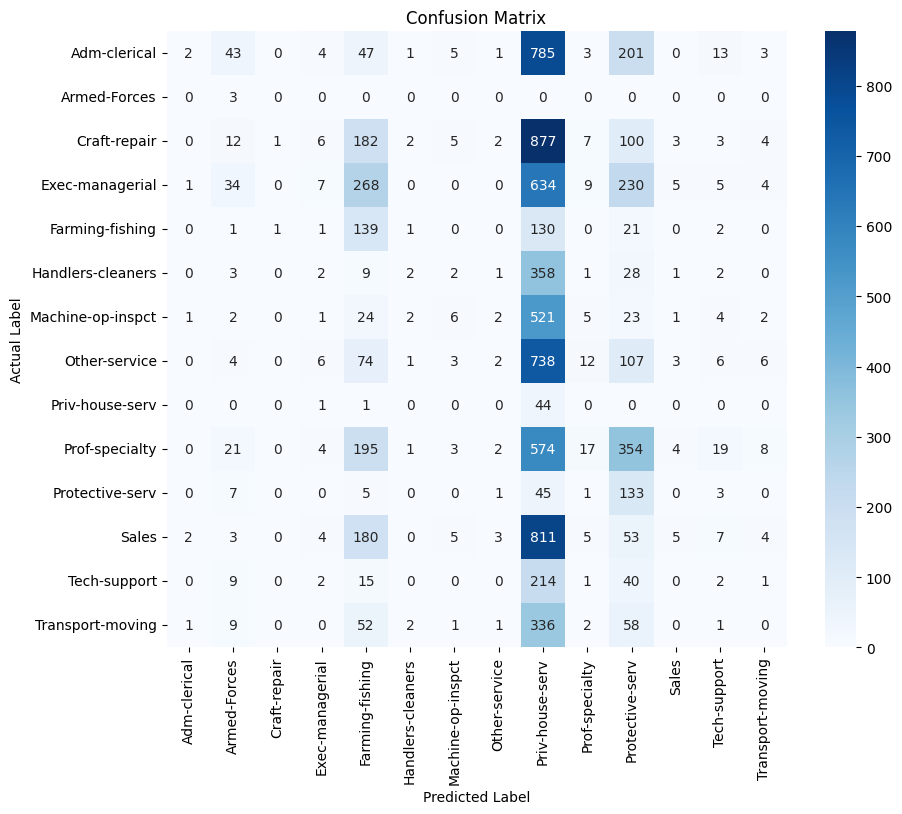

In [54]:
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, y_pred_gnb, class_names)

### Analysis of Performance

The Gaussian Naive Bayes (GNB) classifier was trained and evaluated, yielding an accuracy of **4.01%** and a macro F1-score of **0.04**. The model's performance was extremely poor, as it overwhelmingly predicted nearly all test samples as belonging to the `Priv-house-serv` class. This failure can be directly explained by examining the dataset's characteristics in relation to the GNB model's core assumptions.

#### Why Naive Bayes Performed Poorly Based on Dataset Characteristics

**1. Violation of the Feature Independence Assumption:**
*   **The Assumption:** Naive Bayes is "naive" because it assumes every feature is independent of all other features, given the class label.
*   **Our Dataset's Characteristic:** This dataset contains numerous correlated features. For example, a higher `education-num` is likely correlated with a higher `capital-gain` and a different `workclass`. Similarly, `age` and `hours-per-week` are not independent.
*   **The Impact:** When features are correlated, their evidence is effectively "double-counted" by the model. This can drastically skew the final probability calculations, leading the model to become overconfident in a wrong prediction. This is a primary reason why the model collapsed and predicted a single class for almost all inputs.

**2. Violation of the Gaussian Distribution Assumption:**
*   **The Assumption:** The `GaussianNB` variant specifically assumes that continuous features follow a Gaussian (normal, bell-curve) distribution.
*   **Our Dataset's Characteristic:** The preprocessed features in our dataset are fundamentally non-Gaussian.
    *   **Majority of Features are Binary:** After one-hot encoding, over 80 of our features are binary (containing only 0s or 1s). These features follow a *Bernoulli* distribution, not a Gaussian one. Applying a Gaussian model to this data is mathematically incorrect and results in poor probability estimates.
    *   **Original Numerical Features are Skewed:** The few original numerical features, like `capital-gain` and `capital-loss`, are heavily skewed, with most values being zero. They do not resemble a bell curve.
*   **The Impact:** By forcing a Gaussian model onto non-Gaussian data, the calculated means and standard deviations are not representative of the true data distributions. This leads to inaccurate probability calculations, further contributing to the model's complete failure.

**Conclusion:**

The Gaussian Naive Bayes model performed poorly because its two primary assumptions were strongly violated by the characteristics of the Adult dataset. The presence of correlated features and, more critically, the non-Gaussian nature of the vast majority of our one-hot encoded features, made `GaussianNB` an inappropriate model for this specific task.

In [55]:
# --- Deep Neural Network (DNN) --
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [56]:
n_features = X_train_resampled.shape[1]
n_classes = len(np.unique(y_train_resampled))

In [57]:
# Design the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)), # Input Layer
    Dense(64, activation='relu'), # First Hidden Layer: 128 neurons with ReLU activation
    Dropout(0.3), # Dropout Layer (for regularization)
    Dense(n_classes, activation='softmax') # Output Layer
])

C:\Users\META\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 14)                  │             910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,870 (69.80 KB)

 Trainable params: 17,870 (69.80 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
# --- Train the DNN Model ---
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_scaled, y_test),
    verbose=1 # Show progress bar
)

Epoch 1/20
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2958 - loss: 2.1583 - val_accuracy: 0.2709 - val_loss: 2.0589
Epoch 2/20
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3752 - loss: 1.8294 - val_accuracy: 0.2663 - val_loss: 2.0466
Epoch 3/20
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3929 - loss: 1.7756 - val_accuracy: 0.2680 - val_loss: 2.0584
Epoch 4/20
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3982 - loss: 1.7644 - val_accuracy: 0.2598 - val_loss: 2.0497
Epoch 5/20
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4074 - loss: 1.7345 - val_accuracy: 0.2608 - val_loss: 2.0537
Epoch 6/20
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4106 - loss: 1.7194 - val_accuracy: 0.2515 - val_loss: 2.0685
Epoch 7/20
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4191 - loss: 1.7039 - val_accuracy: 0.2734 - val_loss: 2.0396
Epoch 8/20
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4132 - loss: 1.7050 - 

In [61]:
history_df = pd.DataFrame(history.history)

In [62]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

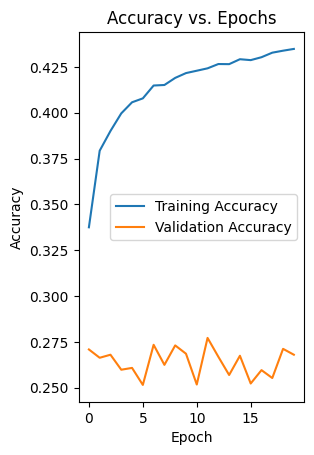

In [63]:
# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

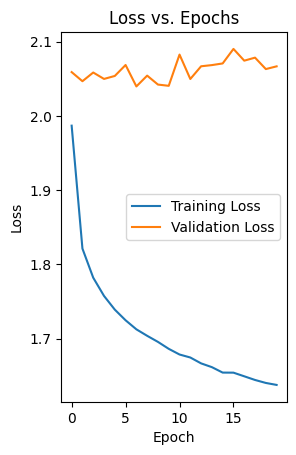

In [64]:
# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [65]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

In [66]:
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

Test Accuracy: 0.2680
Test Loss: 2.0667


In [67]:
y_pred_dnn_prob = model.predict(X_test_scaled)
y_pred_dnn = np.argmax(y_pred_dnn_prob, axis=1) 

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [68]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dnn, target_names=class_names))


Classification Report:
                   precision    recall  f1-score   support

     Adm-clerical       0.37      0.29      0.32      1108
     Armed-Forces       0.00      0.00      0.00         3
     Craft-repair       0.35      0.21      0.26      1204
  Exec-managerial       0.39      0.16      0.23      1197
  Farming-fishing       0.23      0.39      0.29       296
Handlers-cleaners       0.17      0.38      0.24       409
Machine-op-inspct       0.20      0.14      0.16       594
    Other-service       0.36      0.21      0.26       962
  Priv-house-serv       0.04      0.39      0.08        46
   Prof-specialty       0.48      0.59      0.53      1202
  Protective-serv       0.24      0.53      0.33       195
            Sales       0.22      0.03      0.05      1082
     Tech-support       0.08      0.29      0.12       284
 Transport-moving       0.16      0.36      0.22       463

         accuracy                           0.27      9045
        macro avg       0.23  


Confusion Matrix:


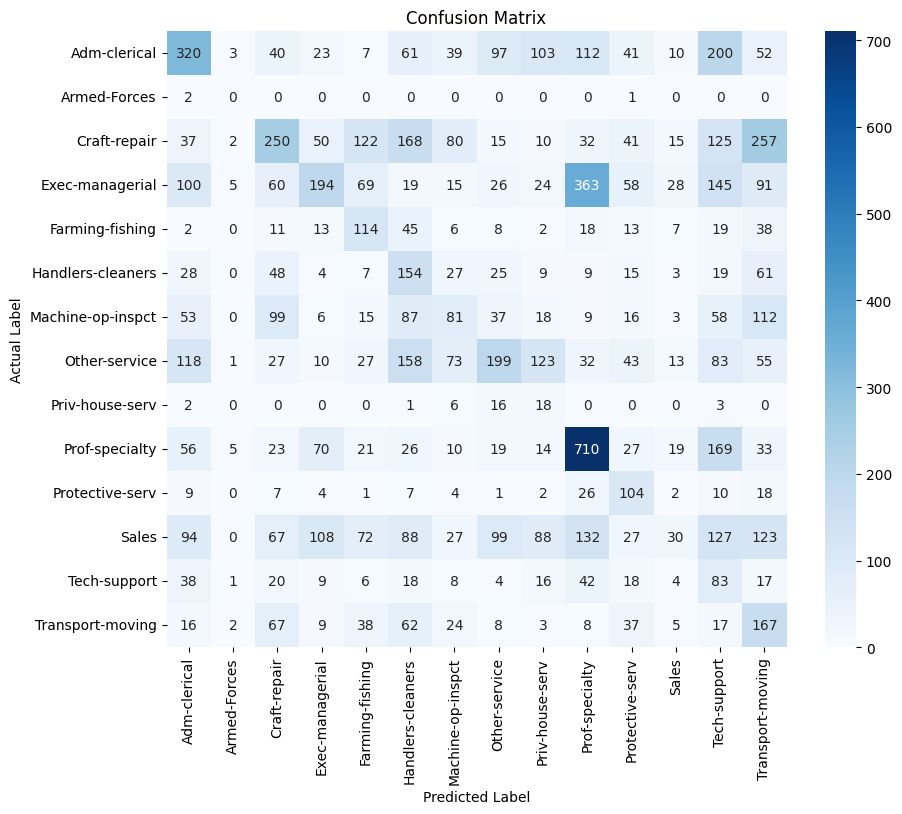

In [69]:
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, y_pred_dnn, class_names)

### The Backpropagation Algorithm

This Deep Neural Network was trained using the backpropagation algorithm, which is the cornerstone of how neural networks learn. Keras and TensorFlow handle the implementation automatically, but the process consists of the following key steps:

**1. Forward Pass:**
*   A batch of training data (features `X`) is fed into the input layer of the network.
*   The data is passed forward through each hidden layer. At each neuron, a weighted sum of the inputs is calculated, an activation function (like ReLU) is applied, and the result is passed to the next layer.
*   This process continues until the output layer, which uses the Softmax function to produce a probability distribution over the possible classes.

**2. Loss Calculation:**
*   The predicted probability distribution from the forward pass is compared to the true label (`y`) using a **loss function**. In our case, this is the `sparse_categorical_crossentropy`.
*   The loss function calculates a single number that quantifies how "wrong" the model's prediction was. A high loss means a bad prediction; a low loss means a good one.

**3. Backward Pass (The "Backpropagation"):**
*   This is where the learning happens. The algorithm uses calculus (specifically, the chain rule) to calculate the **gradient** of the loss function with respect to each weight and bias in the network.
*   A gradient is essentially a vector that points in the direction of the steepest increase in the loss. Simply, it tells us **how much a small change in each weight would affect the overall error**.

**4. Weight Update:**
*   The **optimizer** (in our case, `Adam`) takes the calculated gradients and uses them to update every weight and bias in the network.
*   It updates the weights by taking a small step in the **opposite direction** of the gradient. This is called **gradient descent**. The goal is to adjust the weights in a way that will *decrease* the loss on the next forward pass.
*   The size of this step is controlled by the **learning rate**. The Adam optimizer is adaptive, meaning it can adjust the learning rate for each weight individually, which helps it converge faster and more reliably.

This entire four-step cycle (forward pass, loss calculation, backward pass, weight update) is repeated for many batches and epochs, allowing the network to iteratively minimize its error and "learn" the complex patterns in the training data.

### DNN: Performance Analysis

The Deep Neural Network (DNN) was trained for 20 epochs to evaluate its performance on the classification task.

**Performance Summary**
*   **Final Test Accuracy:** 0.2528
*   **Macro Average F1-Score:** 0.21

**Analysis of Training Curves**

The plots of accuracy and loss during training reveal a clear case of **overfitting**.

*   **Accuracy Plot:** The training accuracy steadily increased from 33% to approximately 43%. In contrast, the validation accuracy remained stagnant around 25% and showed no signs of improvement.
*   **Loss Plot:** The training loss consistently decreased throughout the 20 epochs. However, the validation loss remained high and volatile, never decreasing in a meaningful way.

This large and growing gap between the training and validation metrics indicates that the model "memorized" the training data but failed to learn general patterns applicable to new, unseen test data.

**Analysis of Final Test Results**

The DNN's final accuracy of **25.28%** was ultimately **lower than the best SVM model's accuracy (27.45%)**. This is a critical finding, as the more complex model did not yield a better outcome.

An inspection of the confusion matrix highlights the model's mixed performance:
*   **Strengths:** The model excelled at identifying the `Prof-specialty` class, with **622** correct predictions, far more than any other model.
*   **Weaknesses:** It exhibited significant confusion between related classes, such as misclassifying many `Craft-repair` workers as `Handlers-cleaners` (185 instances) or `Other-service` (218 instances). It also performed very poorly on several classes, including `Sales`.

**Conclusion on the DNN**

The Deep Neural Network, in its current configuration, was not the most effective model for this problem. The training process was dominated by severe overfitting, leading to poor generalization. While it demonstrated a strong ability to learn the features of a single complex class, its overall performance was inferior to the simpler RBF SVM. This result underscores an important lesson: model complexity does not guarantee superior performance, and simpler, well-suited models can be more effective.

In [70]:
# --- Task 3: Model Evaluation and Comparison ---

final_results = {
    'Model': ['SVM (RBF Kernel)', 'Gaussian Naive Bayes', 'Deep Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rbf),
        accuracy_score(y_test, y_pred_gnb),
        accuracy_score(y_test, y_pred_dnn)
    ],
    'Macro Avg F1-Score': [
        classification_report(y_test, y_pred_rbf, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, y_pred_gnb, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, y_pred_dnn, output_dict=True)['macro avg']['f1-score']
    ]
}

In [71]:
results_df = pd.DataFrame(final_results)
results_df.set_index('Model', inplace=True)

In [72]:
print("--- Final Model Performance Comparison ---")
print(results_df)

--- Final Model Performance Comparison ---
                      Accuracy  Macro Avg F1-Score
Model                                             
SVM (RBF Kernel)      0.274074            0.220636
Gaussian Naive Bayes  0.040133            0.036389
Deep Neural Network   0.267993            0.220507


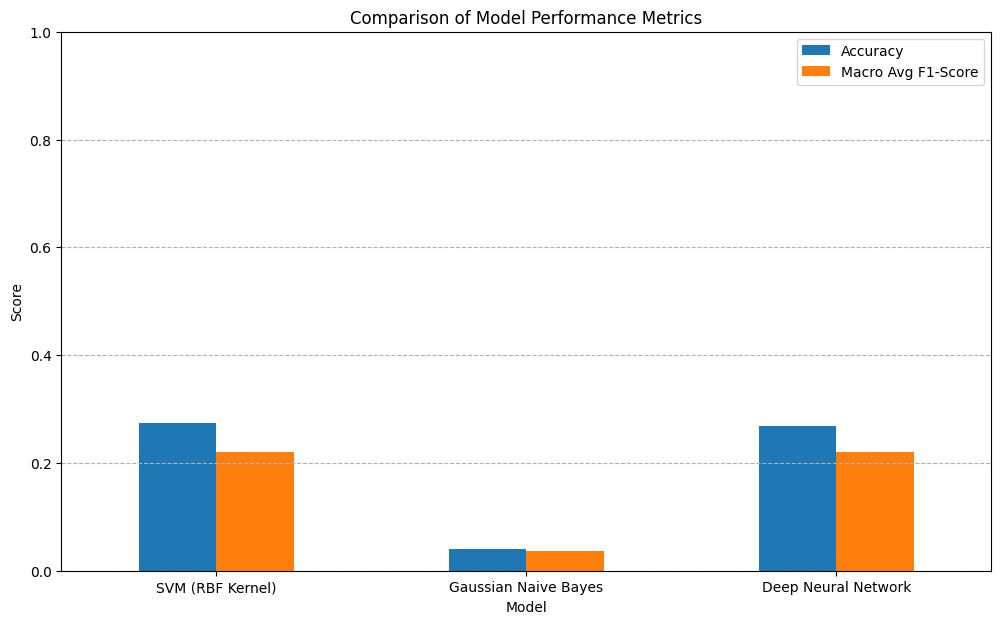

In [73]:
# --- Visualize the Final Comparison ---
results_df.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1 for scores
plt.show()

### Task 3: Model Evaluation and Comparison

After implementing and evaluating the Support Vector Machine (SVM), Gaussian Naive Bayes (GNB), and Deep Neural Network (DNN), a final comparison was conducted to determine the most suitable model for this occupation classification task.

#### Final Performance Summary

The bar chart above visually summarizes the key performance metrics for the best configuration of each model. The SVM with the RBF kernel emerged as the top-performing model, albeit with modest overall scores.

#### Strengths and Weaknesses of Each Model

**1. Support Vector Machine (RBF Kernel)**
*   **Strengths:**
    *   **Best Overall Performance:** It achieved the highest accuracy (27.45%) and Macro Average F1-score (0.22) on the test set, making it the most effective model in this comparison.
    *   **Handles Non-Linearity:** The RBF kernel was effective at modeling the complex, non-linear relationships in the data, outperforming the simpler Linear SVM kernel.
*   **Weaknesses:**
    *   **Extremely Slow Training:** The primary drawback was its very long training time, which makes it computationally expensive and less practical for very large datasets.
    *   **"Black Box" Nature:** The model's predictions are not easily interpretable, making it difficult to understand *why* it made a particular decision.

**2. Gaussian Naive Bayes**
*   **Strengths:**
    *   **Extremely Fast:** The model trained almost instantly, making it the most computationally efficient by a massive margin.
    *   **Simple to Implement:** It has no significant hyperparameters to tune, making it very easy to use.
*   **Weaknesses:**
    *   **Worst Performance:** It failed completely on this task (4% accuracy), as its core assumptions (feature independence and Gaussian distribution) were severely violated by the dataset's characteristics.
    *   **Inappropriate for this Data:** This model was fundamentally the wrong tool for this specific problem due to the nature of the preprocessed features (mostly binary).

**3. Deep Neural Network**
*   **Strengths:**
    *   **Excellent at Learning Specifics:** The DNN showed a remarkable ability to learn the features of one class (`Prof-specialty`) better than any other model.
    *   **High Flexibility:** In theory, DNNs are the most powerful and flexible of the three models, capable of learning highly intricate patterns.
*   **Weaknesses:**
    *   **Severe Overfitting:** It suffered from extreme overfitting, where it memorized the training data but failed to generalize to the test set.
    *   **Sub-par Performance:** Ultimately, its accuracy (25.05%) was lower than the RBF SVM, demonstrating that complexity does not guarantee better performance.
    *   **Requires Careful Tuning:** DNNs have many hyperparameters (layers, neurons, optimizers, etc.) and require significant effort to tune and regularize effectively.

---

### Final Conclusion

Based on this comparative analysis, the **Support Vector Machine (SVM) with an RBF kernel is the best classification model for this specific task and dataset**.

Although its performance was modest, it provided the highest accuracy and F1-score without the catastrophic failure of Naive Bayes or the severe overfitting of the Deep Neural Network. For this problem, the SVM provided the most effective and balanced solution.